## Hypothesis_test_Excercise

In [187]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab

### Question 1 
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [188]:
# Defining the data
cutlets = pd.read_csv("Cutlets.csv")
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [189]:
# Data description 
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [190]:
# Checking for the null values and duplicate values in the data
print("Null values: ",cutlets.isnull().sum())
print("Duplicate values:", cutlets[cutlets.duplicated()].shape)
cutlets[cutlets.duplicated()]

Null values:  Unit A    0
Unit B    0
dtype: int64
Duplicate values: (0, 2)


,Unit A,Unit B


We have to perform a two-tailed t-test using numerical data on two independent samples. It is required to determine whether there is a significant difference between the two samples and whether their means are different.

#### Step 1:
Here we will create two hypothesis
##### Null hypothesis: μ1 = μ2
##### Alternative hypothesis: μ1 != μ2

For this question we want to proove null hypothesis i.e. there is significant difference in the diameter of the cutlet between two units.

#### Step 2:
Here we will decide the cut of value. As the significance is 5%, alpha = 0.05 and as it is two tailed test alpha/2 = 0.025

#### Step 3:
In this step we will collect the information from the data to proove the null hypothesis.

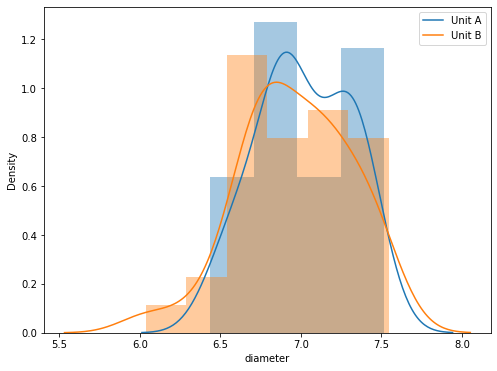

In [191]:
# distribution plots
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'], hist = True)
plt.legend(labels)
plt.xlabel('diameter')
plt.show()

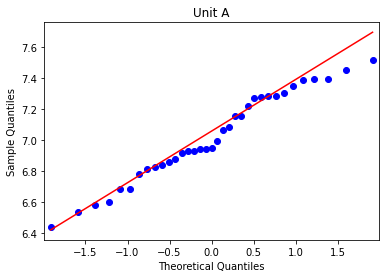

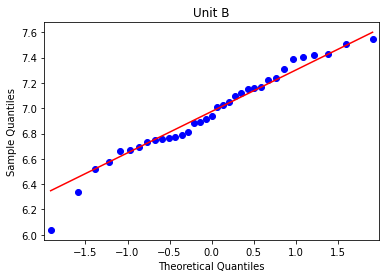

In [192]:
# Plotting Q-Q plot
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

#### Step 4:
Using t-statistics, compare the evidence to the hypothesis. 

In [193]:
stats, p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value = ', p_value)

p_value =  0.4722394724599501


Here alpha is 0.025 

We reject null hypothesis only if alpha = p_value

In this case the Significnace i.e. alpha value is much lesser than p-value, hence we fail to reject Null hypothesis

##### Since there is insufficient evidence to support the null hypothesis that there is a significant difference between the two samples, we are reject null hypothesis.

### Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [194]:
ImageGrab.grabclipboard()

In [195]:
# Defining the data
labtat = pd.read_csv("LabTAT.csv")
print(labtat.info())
labtat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB
None


,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [196]:
# Data description 
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [197]:
# Checking for the null values and duplicate values in the data
print("Null values: ", labtat.isnull().sum())
print("Duplicate values:", labtat[labtat.duplicated()].shape)
labtat[labtat.duplicated()]

Null values:  Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64
Duplicate values: (0, 4)


,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


Here we will conduct ANOVA test on these 4 independent samples. We will find if the means of any of these samples are similar or different.

#### Step 1:
In this step we will define two hypothesis, one of which contradicts the other.
##### Null Hypothesis : The mean TAT are same among the different laboratories.
##### Alternative Hypothesis : There is a difference in average TAT among the different laboratories

##### Null Hypothesis : μ1 = μ2 = μ3 = μ4
##### Alternative Hypothesis : Atlease one of them is different.

#### Step 2:
Here we will decide the cut of value. 
##### As the significance is 5%, alpha = 0.05

#### Step 3:
In this step we will collect the information from the data to proove the null hypothesis.

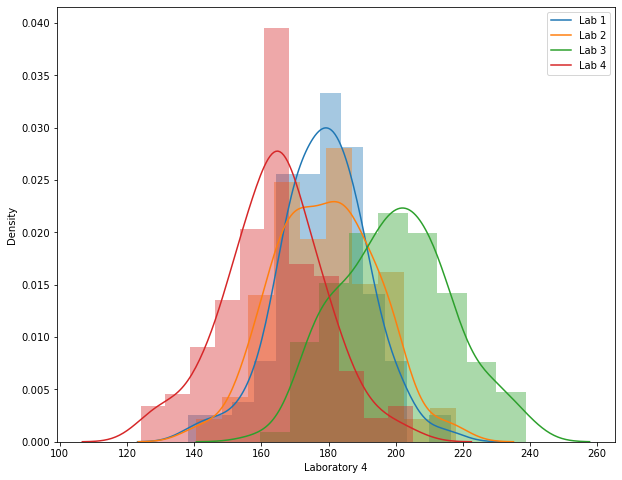

In [198]:
# Distribution plot
plt.figure(figsize = (10,8))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'], hist = True)
sns.distplot(labtat['Laboratory 3'], hist = True)
sns.distplot(labtat['Laboratory 4'], hist = True)
plt.legend(labels)
plt.show()

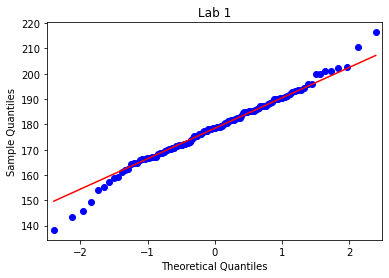

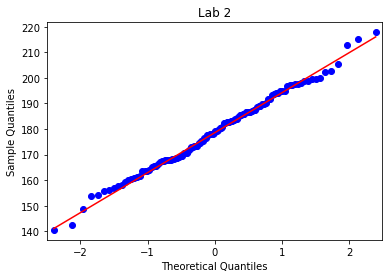

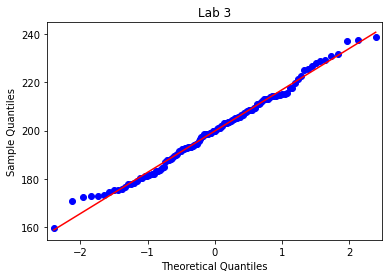

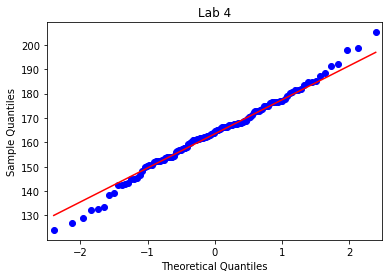

In [199]:
# Plotting Q-Q plot
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Lab 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Lab 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Lab 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Lab 4')
plt.show()

#### Step 4:
Compare p_value with alpha(Significane Level)
##### If p_value is > alpha, we failed to reject Null Hypothesis because of lack of evidence
##### If p_value is >= alpha, we reject Null Hypothesis

In [200]:
from scipy.stats import f_oneway

# performing ANOVA on its first four columns
test_stats, p_value = f_oneway(labtat.iloc[:, 0], labtat.iloc[:, 1], labtat.iloc[:, 2], labtat.iloc[:, 3])
print('Test Statistics:', test_stats, 'p-value =', round(p_value, 6))

Test Statistics: 118.70421654401437 p-value = 0.0


##### We reject Null Hypothesis there since the p-value is less than alpha (Significance) and we proove that there is a significance difference between TAT of reports of the laboratories.

### Question 3
Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
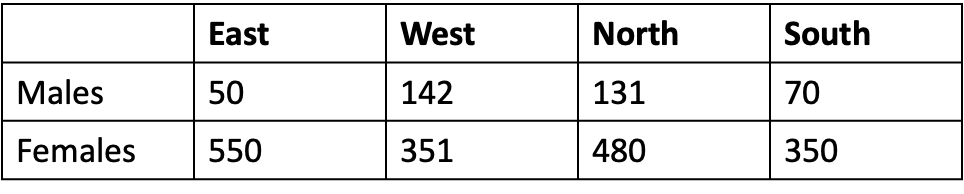 
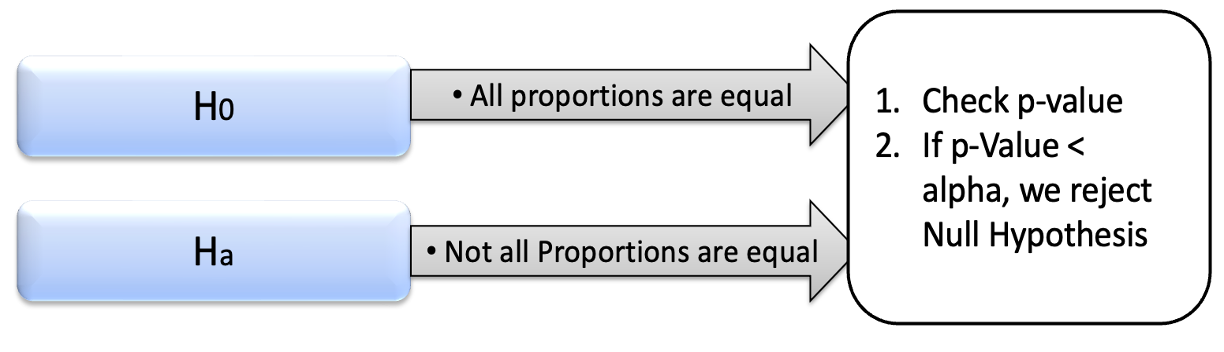 

In [201]:
# Defining the data
buyer = pd.read_csv("BuyerRatio.csv")
print(buyer.info())
buyer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes
None


,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


Four discrete variables are the inputs (east, west, north, south).

Moreover, output is discrete. Our goal is to determine whether or not the proportions of men and women are the same throughout the various regions. We use the chi-square test.

#### Step 1:
We will create hypothesis

##### Ho= Proportions of Male and Female are same
##### Ha= Proportions of Male and Female are not same

#### Step 2:
Cut-off value
Significance 5%
alpha = 0.05

#### Step 3:
In this step we will collect the information from the data.

In [202]:
# Creating array from data
array_buyer = buyer[['East', 'West', 'North', 'South']].to_numpy()
array_buyer

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

Using the Chi-Square contingency table, the observed value is transformed into the expected value.

In [203]:
import scipy.stats as stats

stats, p_value, degree_of_freedom, expected = stats.chi2_contingency(array_buyer)
print('statistics: ', stats)
print('p_value is ', p_value) 
print('degree_of_freedom: ', degree_of_freedom)
print('expected value: ', expected)

statistics:  1.595945538661058
p_value is  0.6603094907091882
degree_of_freedom:  3
expected value:  [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [204]:
expected_values = np.concatenate(np.array(expected))
observed_values = np.concatenate(np.array(array_buyer))
print(observed_values, "\n", expected_values)

[  50  142  131   70  435 1523 1356  750] 
 [  42.76531299  146.81287862  131.11756787   72.30424052  442.23468701
 1518.18712138 1355.88243213  747.69575948]


#### Step 4:
Comparing the evidance with hypothesis.

In [205]:
import scipy.stats as stats

stats, p_value = stats.chisquare(observed_values, expected_values, ddof = 3)
print('Statistics: ', stats)
print('P_Value: ', p_value)

Statistics:  1.595945538661058
P_Value:  0.8095206647678864


Since p-value > 0.05, we fail to reject null hypothesis.

##### As a result, the ratio of male and female buyers are similar across regions and do not depend on one another. Therefore, Independent samples


### Question 4
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

In [206]:
# Defining the data
cof = pd.read_csv("Costomer+OrderForm.csv")
print(cof.info())
cof.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB
None


,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


We will use a Chi-Square test with a contingency table to perform a Test of Independence. We have to check if the averages of any of these samples are similar or different.

#### Step 1:
We will create hypothesis

##### Ho= defective % remain same in all the centres
##### Ha= defective % varies by centre

#### Step 2:
Cut-off value
Significance 5%
alpha = 0.05

#### Step 3:
In this step we will collect the information from the data.

In [207]:
contingency_table = cof.apply(pd.Series.value_counts)
contingency_table

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


In [208]:
contingency_array = contingency_table.to_numpy()
contingency_array

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

Using the Chi-Square contingency table, the observed value is transformed into the expected value.

In [209]:
import scipy.stats as stats

stats, p_value, degree_of_freedom, expected = stats.chi2_contingency(contingency_array)
print('statistics: ', stats)
print('p_value is ', p_value) 
print('degree_of_freedom: ', degree_of_freedom)
print('expected value: ', expected)

statistics:  3.858960685820355
p_value is  0.2771020991233135
degree_of_freedom:  3
expected value:  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [210]:
expected_values = np.concatenate(np.array(expected))
observed_values = np.concatenate(np.array(contingency_array))
print(observed_values, "\n", expected_values)

[271 267 269 280  29  33  31  20] 
 [271.75 271.75 271.75 271.75  28.25  28.25  28.25  28.25]


#### Step 4: 
Comparing the evidance with hypothesis.

In [211]:
import scipy.stats as stats

stats, p_value = stats.chisquare(observed_values, expected_values, ddof = 3)
print('Statistics: ', stats)
print('P_Value: ', p_value)

Statistics:  3.858960685820355
P_Value:  0.4254298144535761


Since p-value > 0.05, we fail to reject null hypothesis.
##### Hence defective % are same in all centers. 